KNN ON SYNTHETIC DATA AND TEST DATA

|   iter    |  target   | n_neig... |
-------------------------------------
| 1         | 0.8538    | 8.116     |
| 2         | 0.8525    | 19.06     |
| 3         | 0.8513    | 14.91     |
| 4         | 0.855     | 12.37     |
| 5         | 0.8425    | 3.964     |
| 6         | 0.85      | 11.07     |
| 7         | 0.8538    | 8.116     |
| 8         | 0.855     | 12.9      |
| 9         | 0.8525    | 17.16     |
| 10        | 0.8012    | 1.0       |
| 11        | 0.8575    | 6.163     |
| 12        | 0.8525    | 19.99     |
| 13        | 0.8575    | 6.95      |
| 14        | 0.8575    | 6.546     |
| 15        | 0.8525    | 5.541     |
| 16        | 0.8525    | 16.09     |
| 17        | 0.8512    | 9.501     |
| 18        | 0.845     | 7.395     |
| 19        | 0.8475    | 13.88     |
| 20        | 0.8513    | 18.11     |
| 21        | 0.8538    | 8.761     |
| 22        | 0.8012    | 2.825     |
| 23        | 0.8488    | 10.29     |
| 24        | 0.8512    | 4.724     |
| 25        

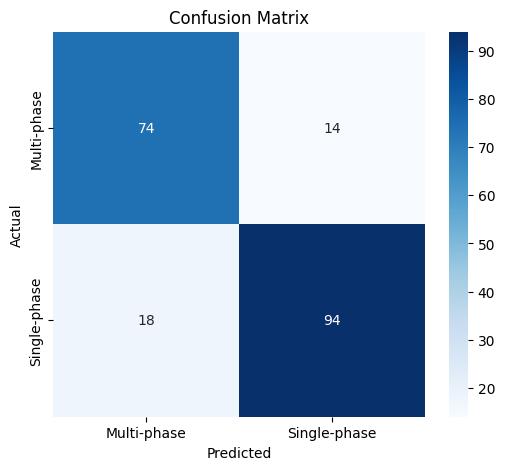

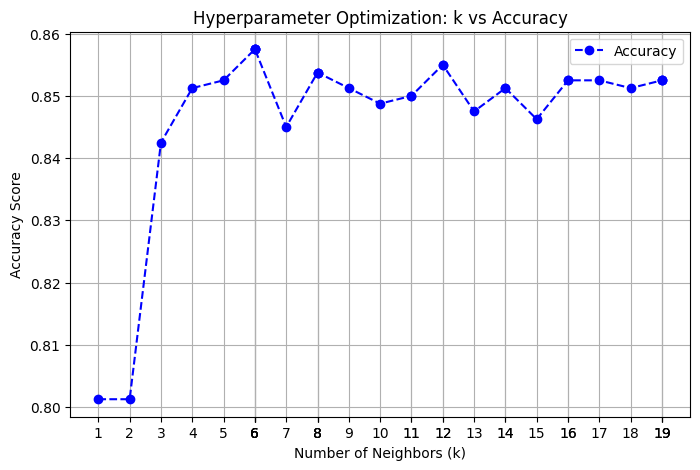

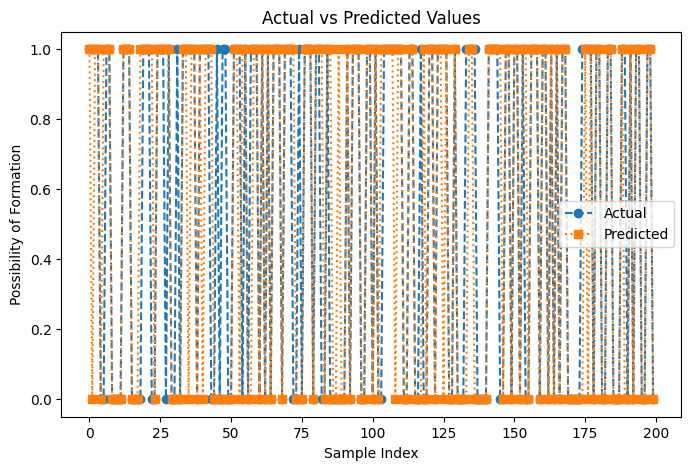

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from bayes_opt import BayesianOptimization

# --- Load dataset ---
df = pd.read_csv('samples_1000_CTGAN.csv')

# Separate features and target
X = df.drop(columns=["Possibility of formation"])
y = df["Possibility of formation"]

# Split into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Standardize Features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Define Bayesian Optimization function ---
def knn_evaluate(n_neighbors):
    n_neighbors = int(n_neighbors)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Perform K-Fold Cross-Validation (e.g., 5 folds)
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    # Return the mean accuracy score across all folds
    return np.mean(cv_scores)

# --- Define Bayesian Optimizer ---
optimizer = BayesianOptimization(
    f=knn_evaluate,
    pbounds={'n_neighbors': (1, 20)},  # K values between 1 and 20
    random_state=42,
)

# --- Run optimization ---
optimizer.maximize(init_points=5, n_iter=25)

# --- Get best parameters ---
best_k = int(optimizer.max['params']['n_neighbors'])
print(f"Best number of neighbors: {best_k}")

# --- Train optimized KNN model ---
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn_model.predict(X_test_scaled)

# --- Evaluate model ---
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Optimized Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# --- Confusion Matrix Plot ---
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Multi-phase", "Single-phase"], 
            yticklabels=["Multi-phase", "Single-phase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# --- Extract hyperparameter values and corresponding accuracy scores from Bayesian Optimization ---
k_values = [int(res["params"]["n_neighbors"]) for res in optimizer.res]
accuracy_scores = [res["target"] for res in optimizer.res]

# --- Sort values for better visualization ---
sorted_indices = np.argsort(k_values)
k_values = np.array(k_values)[sorted_indices]
accuracy_scores = np.array(accuracy_scores)[sorted_indices]

# --- Plot hyperparameter vs accuracy ---
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='b', label="Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy Score")
plt.title("Hyperparameter Optimization: k vs Accuracy")
plt.xticks(k_values)  # Show exact k values on x-axis
plt.grid(True)
plt.legend()
plt.show()

# --- Plot Actual vs Predicted Labels ---
def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(8, 5))
    plt.plot(y_test.values, label="Actual", marker='o', linestyle='dashed')
    plt.plot(y_pred, label="Predicted", marker='s', linestyle='dotted')
    plt.xlabel("Sample Index")
    plt.ylabel("Possibility of Formation")
    plt.title("Actual vs Predicted Values")
    plt.legend()
    plt.show()

plot_actual_vs_predicted(y_test, y_pred)


|   iter    |  target   | n_neig... |
-------------------------------------
| 1         | 0.843     | 8.116     |
| 2         | 0.846     | 19.06     |
| 3         | 0.839     | 14.91     |
| 4         | 0.842     | 12.37     |
| 5         | 0.841     | 3.964     |
| 6         | 0.846     | 19.83     |
| 7         | 0.82      | 1.003     |
| 8         | 0.844     | 6.005     |
| 9         | 0.844     | 10.27     |
| 10        | 0.844     | 17.36     |
| 11        | 0.845     | 18.36     |
| 12        | 0.842     | 5.098     |
| 13        | 0.844     | 6.994     |
| 14        | 0.845     | 11.21     |
| 15        | 0.846     | 19.47     |
| 16        | 0.846     | 20.0      |
| 17        | 0.846     | 19.24     |
| 18        | 0.846     | 19.65     |
| 19        | 0.846     | 19.15     |
| 20        | 0.846     | 19.36     |
| 21        | 0.846     | 19.91     |
| 22        | 0.845     | 18.96     |
| 23        | 0.852     | 9.222     |
| 24        | 0.852     | 9.222     |
| 25        

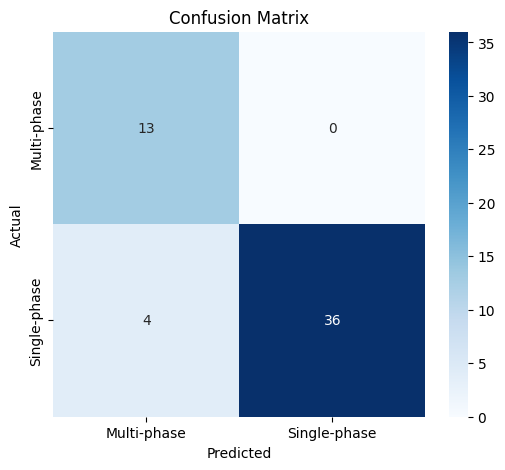

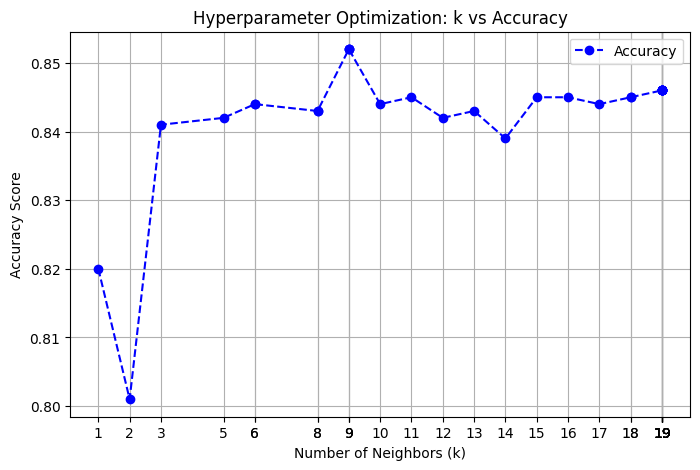

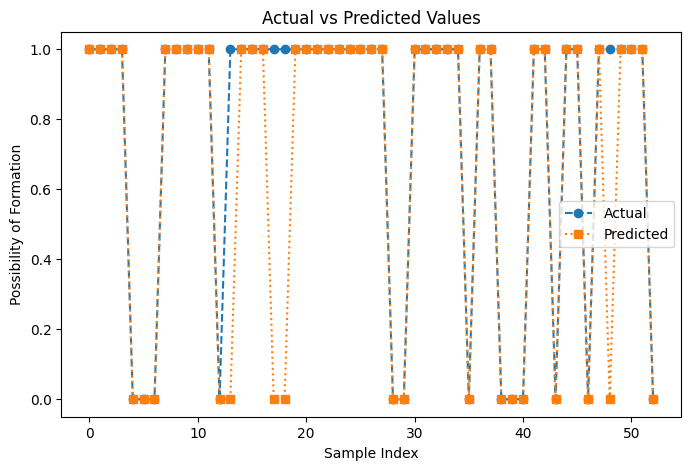

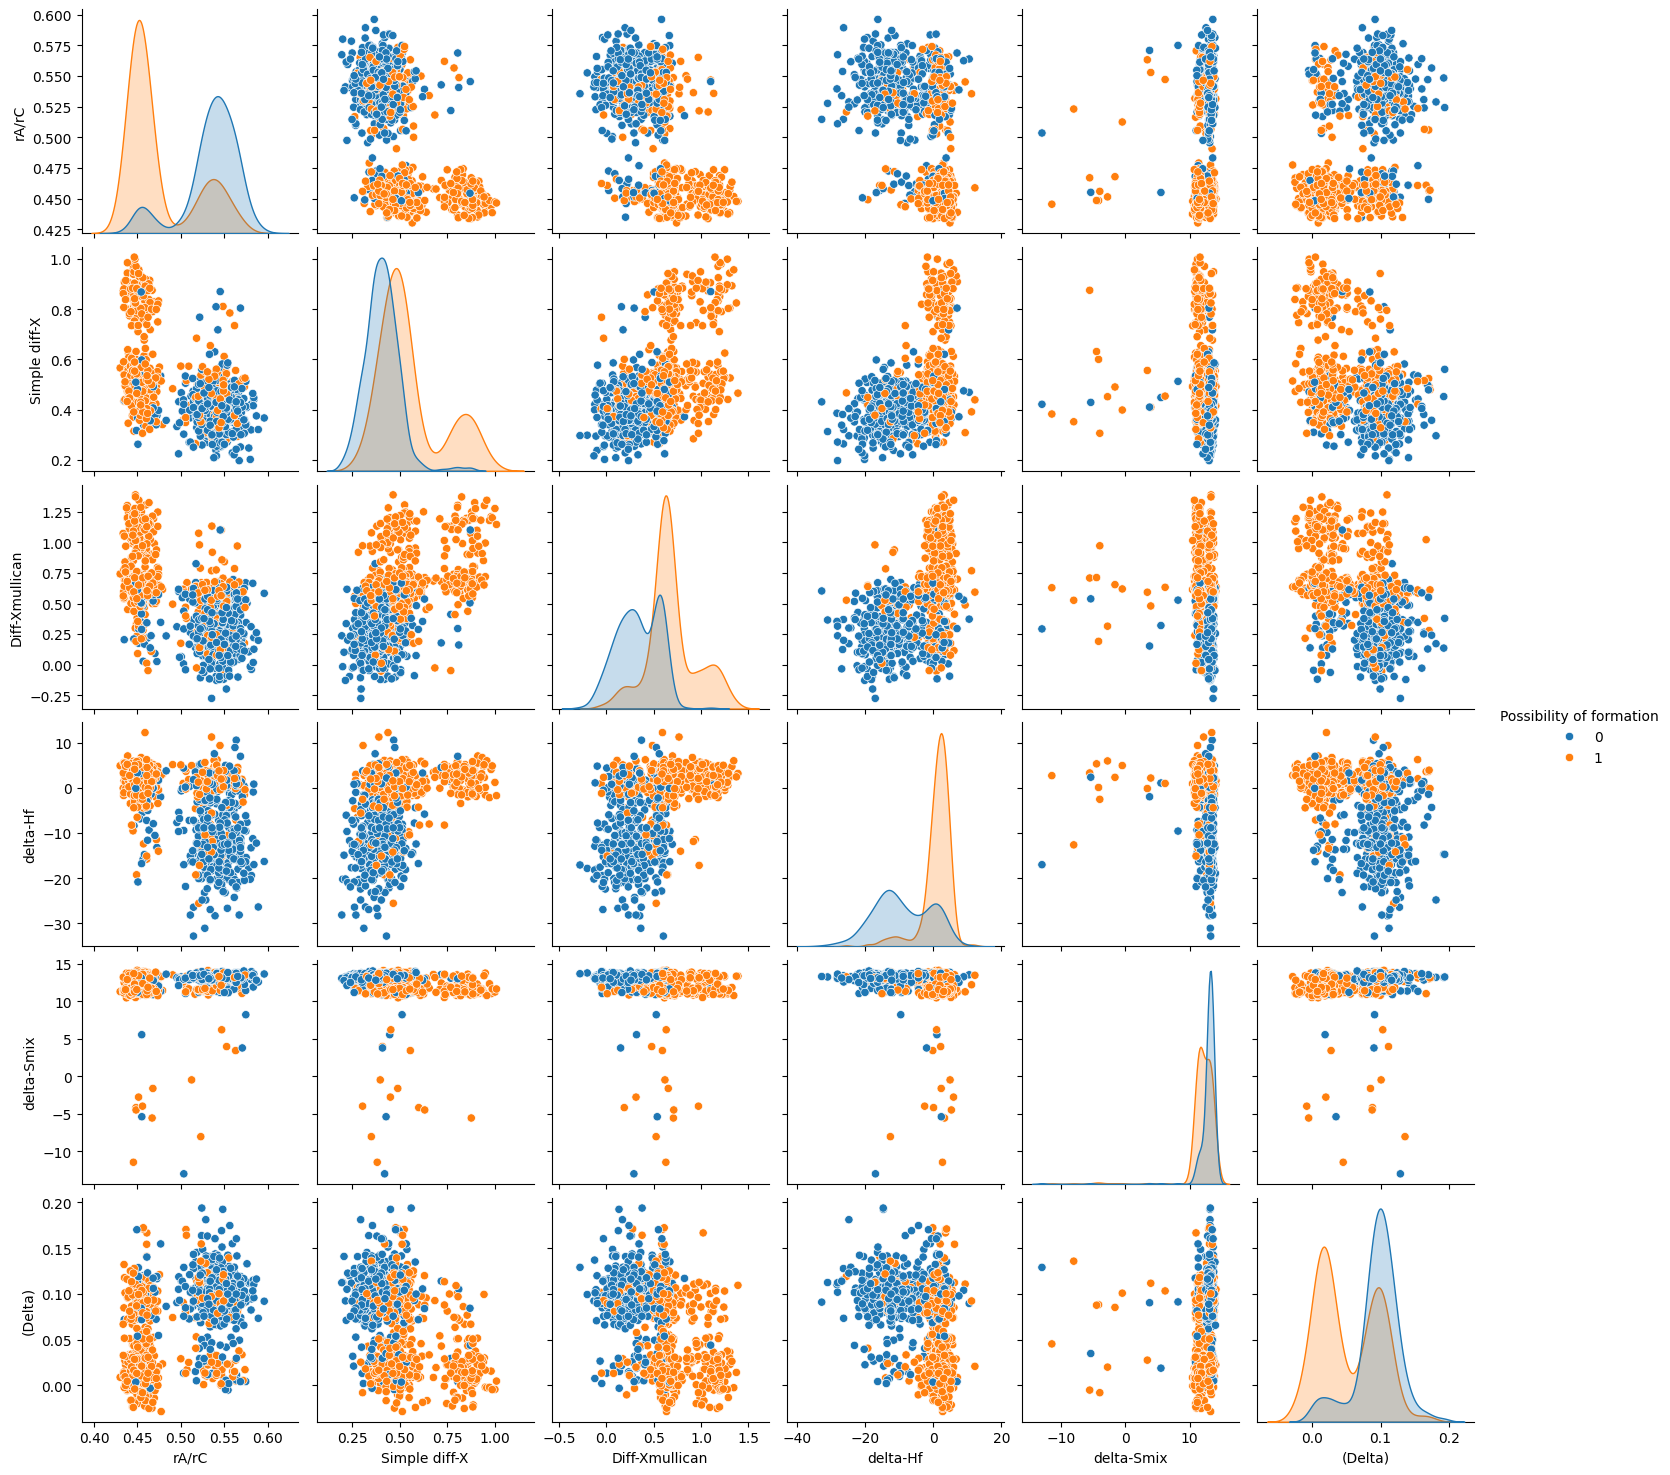

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from bayes_opt import BayesianOptimization

# --- Load dataset ---
df = pd.read_csv('samples_1000_CTGAN.csv')
df_test = pd.read_csv('test_set.csv')

# Separate features and target
X = df.drop(columns=["Possibility of formation"])
y = df["Possibility of formation"]

X_train = X
y_train = y
X_test = df_test.drop(columns=["Possibility of formation"])
y_test = df_test["Possibility of formation"]

# --- Standardize Features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Define Bayesian Optimization function with K-Fold Cross-Validation ---
def knn_evaluate(n_neighbors):
    n_neighbors = int(n_neighbors)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Perform K-Fold Cross-Validation (e.g., 5 folds)
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    # Return the mean accuracy score across all folds
    return np.mean(cv_scores)

# --- Define Bayesian Optimizer ---
optimizer = BayesianOptimization(
    f=knn_evaluate,
    pbounds={'n_neighbors': (1, 20)},  # K values between 1 and 20
    random_state=42,
)

# --- Run optimization ---
optimizer.maximize(init_points=5, n_iter=25)

# --- Get best parameters ---
best_k = int(optimizer.max['params']['n_neighbors'])
print(f"Best number of neighbors: {best_k}")

# --- Train optimized KNN model ---
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn_model.predict(X_test_scaled)

# --- Evaluate model ---
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Optimized Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# --- Confusion Matrix Plot ---
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Multi-phase", "Single-phase"], 
            yticklabels=["Multi-phase", "Single-phase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# --- Extract hyperparameter values and corresponding accuracy scores from Bayesian Optimization ---
k_values = [int(res["params"]["n_neighbors"]) for res in optimizer.res]
accuracy_scores = [res["target"] for res in optimizer.res]

# --- Sort values for better visualization ---
sorted_indices = np.argsort(k_values)
k_values = np.array(k_values)[sorted_indices]
accuracy_scores = np.array(accuracy_scores)[sorted_indices]

# --- Plot hyperparameter vs accuracy ---
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='b', label="Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy Score")
plt.title("Hyperparameter Optimization: k vs Accuracy")
plt.xticks(k_values)  # Show exact k values on x-axis
plt.grid(True)
plt.legend()
plt.show()

# --- Plot Actual vs Predicted Labels ---
def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(8, 5))
    plt.plot(y_test.values, label="Actual", marker='o', linestyle='dashed')
    plt.plot(y_pred, label="Predicted", marker='s', linestyle='dotted')
    plt.xlabel("Sample Index")
    plt.ylabel("Possibility of Formation")
    plt.title("Actual vs Predicted Values")
    plt.legend()
    plt.show()

plot_actual_vs_predicted(y_test, y_pred)

# --- Pairplot ---
def plot_pairplot(df):
    sns.pairplot(df, hue="Possibility of formation", diag_kind="kde")
    plt.show()

plot_pairplot(df)


RF ON SYNTHETIC DATA AND TEST DATA

|   iter    |  target   | n_esti... |
-------------------------------------
| 1         | 0.8637    | 81.16     |
| 2         | 0.8612    | 190.6     |
| 3         | 0.8662    | 149.1     |
| 4         | 0.8637    | 123.7     |
| 5         | 0.8562    | 39.64     |
| 6         | 0.865     | 164.3     |
| 7         | 0.8675    | 147.8     |
| 8         | 0.8662    | 142.5     |
| 9         | 0.8625    | 173.4     |
| 10        | 0.8637    | 96.91     |
| 11        | 0.8637    | 134.0     |
| 12        | 0.8637    | 110.3     |
| 13        | 0.8613    | 66.86     |
| 14        | 0.8525    | 10.02     |
| 15        | 0.8637    | 88.98     |
| 16        | 0.8625    | 200.0     |
| 17        | 0.8562    | 55.12     |
| 18        | 0.865     | 117.0     |
| 19        | 0.8588    | 25.97     |
| 20        | 0.8662    | 158.7     |
| 21        | 0.8625    | 181.6     |
| 22        | 0.8662    | 145.5     |
| 23        | 0.8637    | 103.5     |
| 24        | 0.8625    | 74.75     |
| 25        

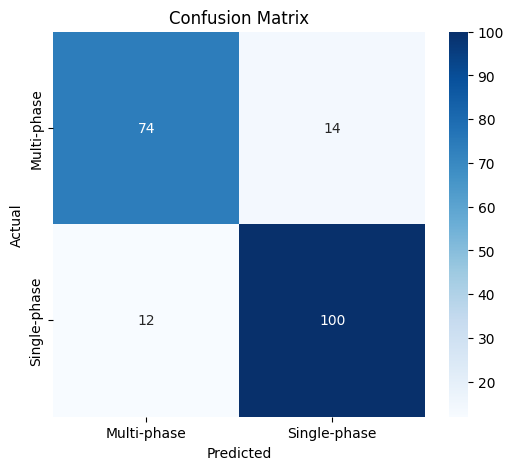

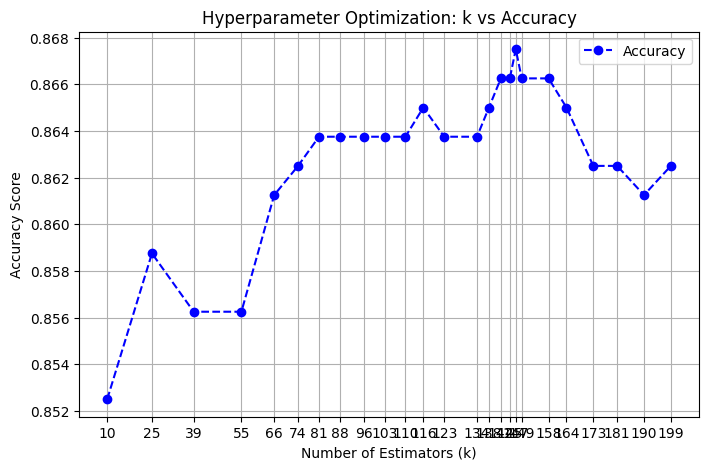

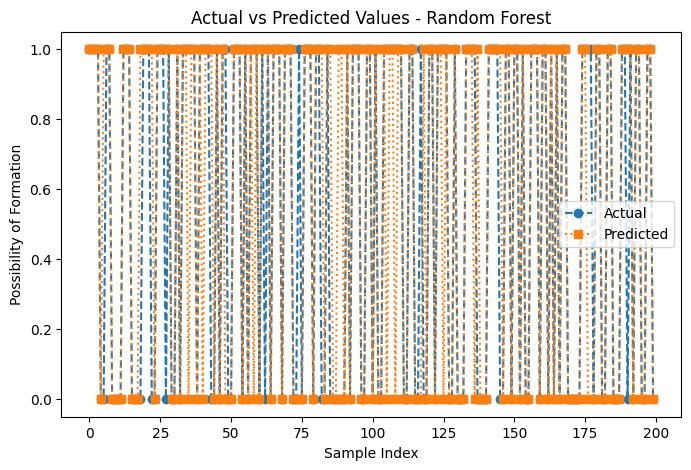

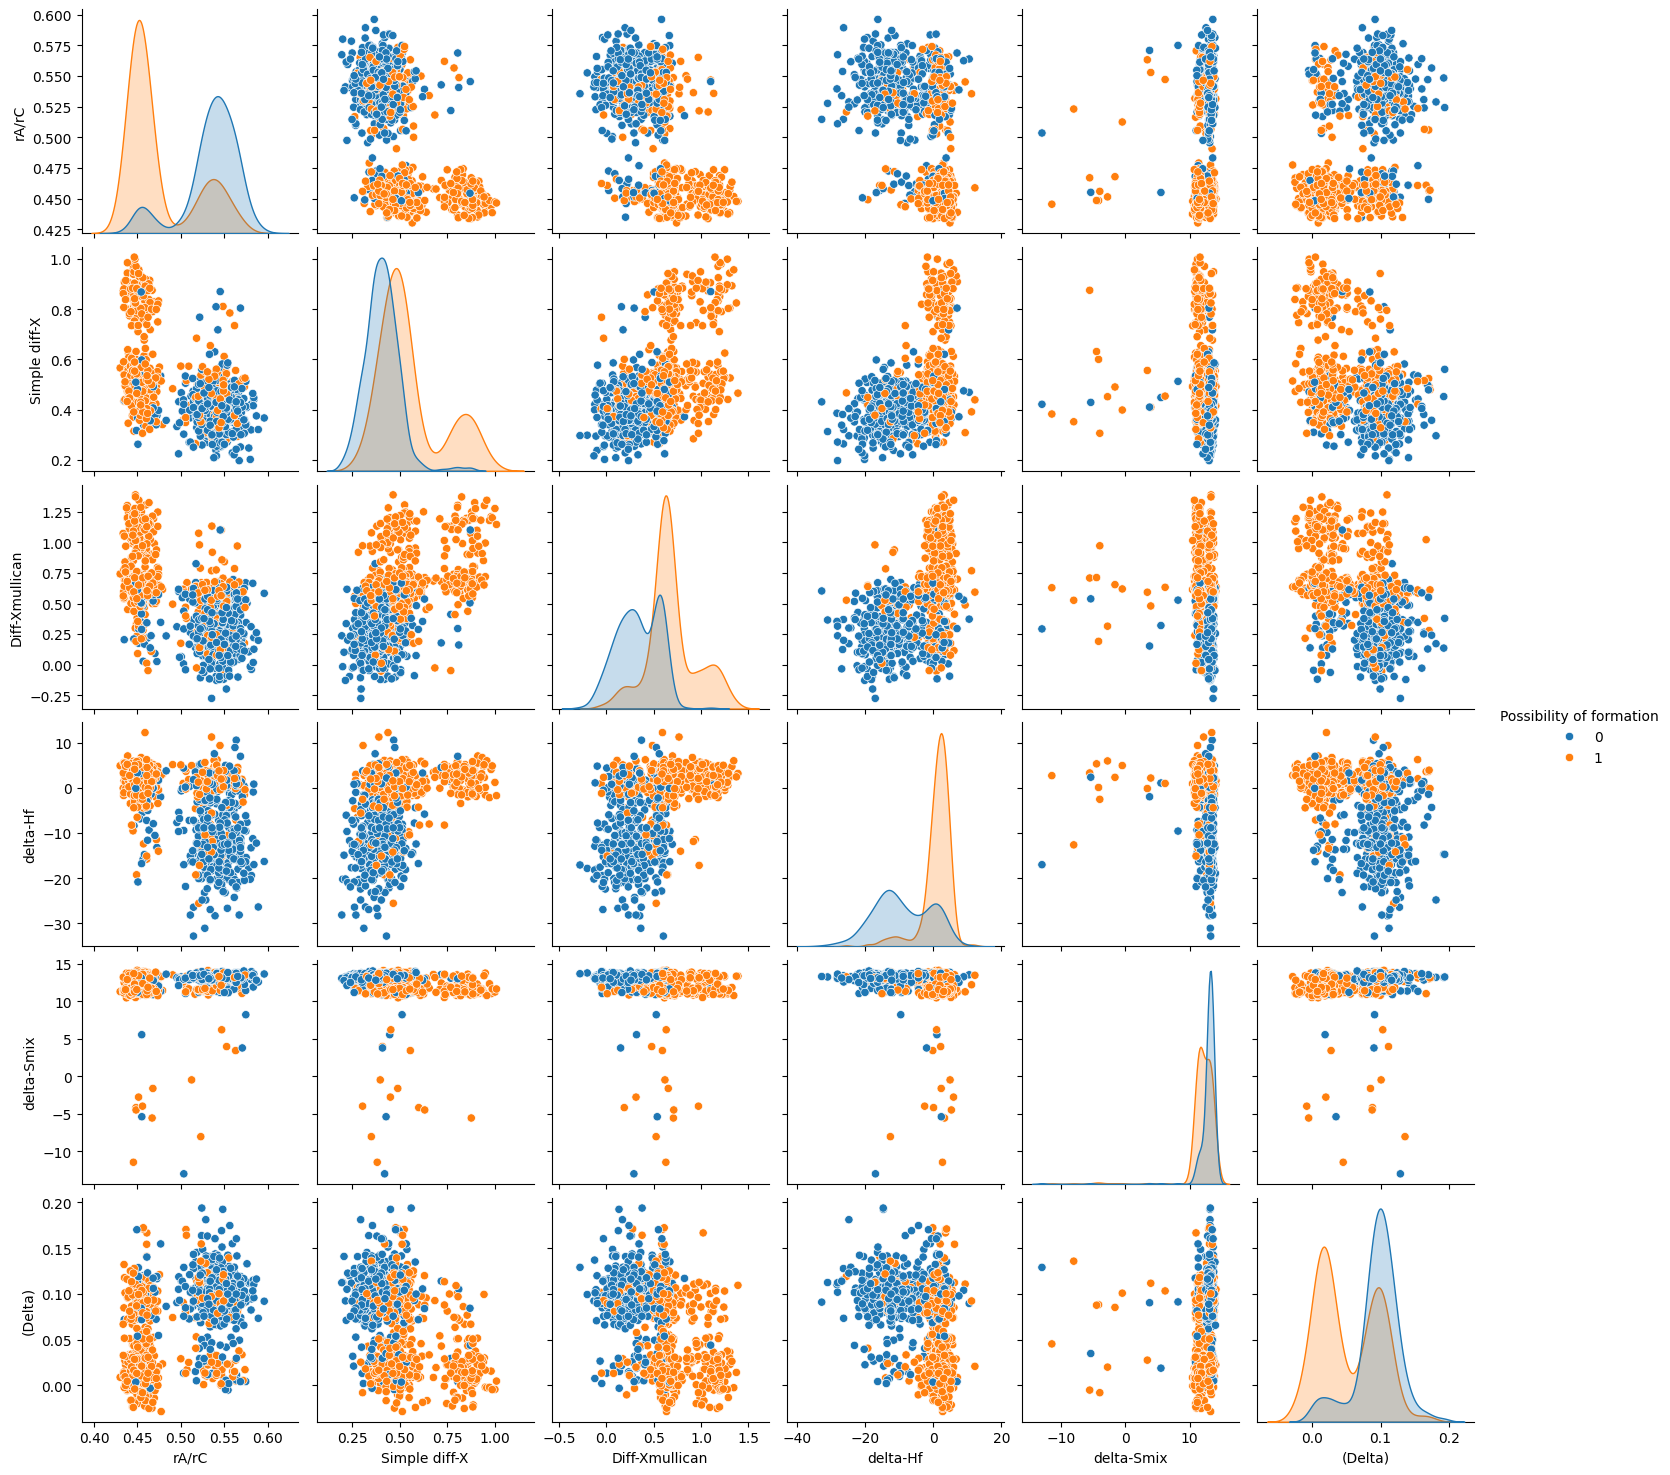

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from bayes_opt import BayesianOptimization

# --- Load dataset ---
df = pd.read_csv('samples_1000_CTGAN.csv')

# Separate features and target
X = df.drop(columns=["Possibility of formation"])
y = df["Possibility of formation"]

# --- Split into training and testing sets (80% train, 20% test) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Standardize Features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Define Bayesian Optimization function with K-Fold Cross-Validation ---
def rf_evaluate(n_estimators):
    n_estimators = int(n_estimators)  # Convert float to int
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    
    # Perform K-Fold Cross-Validation (e.g., 5 folds)
    cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    # Return the mean accuracy score across all folds
    return np.mean(cv_scores)

# --- Define Bayesian Optimizer ---
optimizer = BayesianOptimization(
    f=rf_evaluate,
    pbounds={'n_estimators': (10, 200)},  # Number of trees between 10 and 200
    random_state=42,
)

# --- Run optimization ---
optimizer.maximize(init_points=5, n_iter=20)

# --- Get best parameters ---
best_n_estimators = int(optimizer.max['params']['n_estimators'])
print(f"Best number of estimators: {best_n_estimators}")

# --- Train optimized Random Forest model ---
rf_model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# --- Predictions ---
y_pred = rf_model.predict(X_test_scaled)

# --- Evaluate model ---
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Optimized Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# --- Confusion Matrix Plot ---
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Multi-phase", "Single-phase"], 
            yticklabels=["Multi-phase", "Single-phase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# --- Extract optimization results ---
k_values = [int(res["params"]["n_estimators"]) for res in optimizer.res]
accuracy_scores = [res["target"] for res in optimizer.res]

# --- Sort values for better visualization ---
sorted_indices = np.argsort(k_values)
k_values = np.array(k_values)[sorted_indices]
accuracy_scores = np.array(accuracy_scores)[sorted_indices]

# --- Plot hyperparameter vs accuracy ---
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='b', label="Accuracy")
plt.xlabel("Number of Estimators (k)")
plt.ylabel("Accuracy Score")
plt.title("Hyperparameter Optimization: k vs Accuracy")
plt.xticks(k_values)  # Show exact k values on x-axis
plt.grid(True)
plt.legend()
plt.show()

# --- Plot Actual vs Predicted Labels ---
def plot_actual_vs_predicted(y, y_pred):
    plt.figure(figsize=(8, 5))
    plt.plot(y.values, label="Actual", marker='o', linestyle='dashed')
    plt.plot(y_pred, label="Predicted", marker='s', linestyle='dotted')
    plt.xlabel("Sample Index")
    plt.ylabel("Possibility of Formation")
    plt.title("Actual vs Predicted Values - Random Forest")
    plt.legend()
    plt.show()

plot_actual_vs_predicted(y_test, y_pred)

# --- Pairplot ---
def plot_pairplot(df):
    sns.pairplot(df, hue="Possibility of formation", diag_kind="kde")
    plt.show()

plot_pairplot(df)


|   iter    |  target   | n_esti... |
-------------------------------------
| 1         | 0.854     | 81.16     |
| 2         | 0.855     | 190.6     |
| 3         | 0.857     | 149.1     |
| 4         | 0.858     | 123.7     |
| 5         | 0.852     | 39.64     |
| 6         | 0.859     | 133.1     |
| 7         | 0.859     | 132.0     |
| 8         | 0.849     | 10.01     |
| 9         | 0.859     | 132.6     |
| 10        | 0.859     | 132.6     |
| 11        | 0.859     | 134.9     |
| 12        | 0.857     | 170.9     |
| 13        | 0.855     | 102.9     |
| 14        | 0.86      | 138.9     |
| 15        | 0.851     | 61.71     |
| 16        | 0.858     | 200.0     |
| 17        | 0.857     | 161.7     |
| 18        | 0.856     | 142.5     |
| 19        | 0.856     | 115.0     |
| 20        | 0.857     | 179.5     |
| 21        | 0.847     | 25.67     |
| 22        | 0.856     | 92.48     |
| 23        | 0.857     | 155.1     |
| 24        | 0.847     | 50.14     |
| 25        

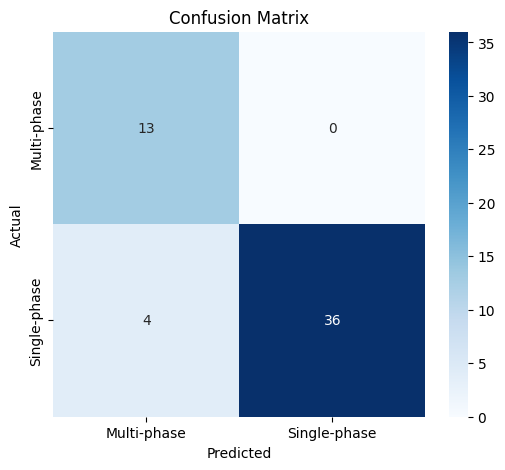

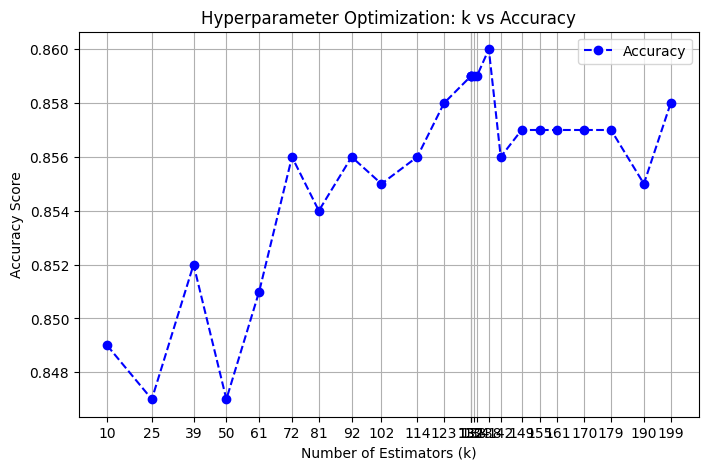

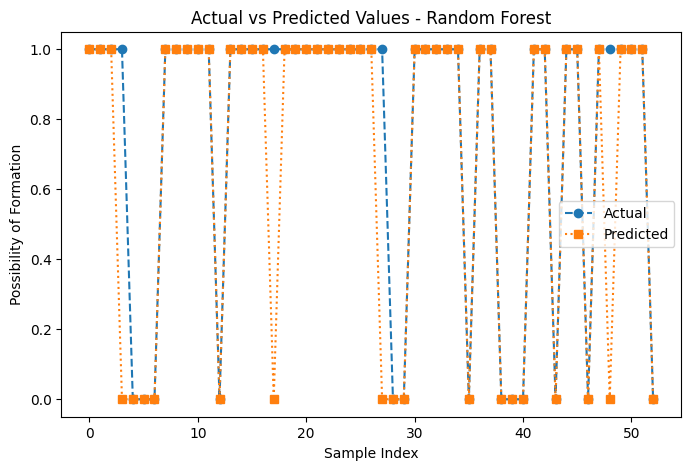

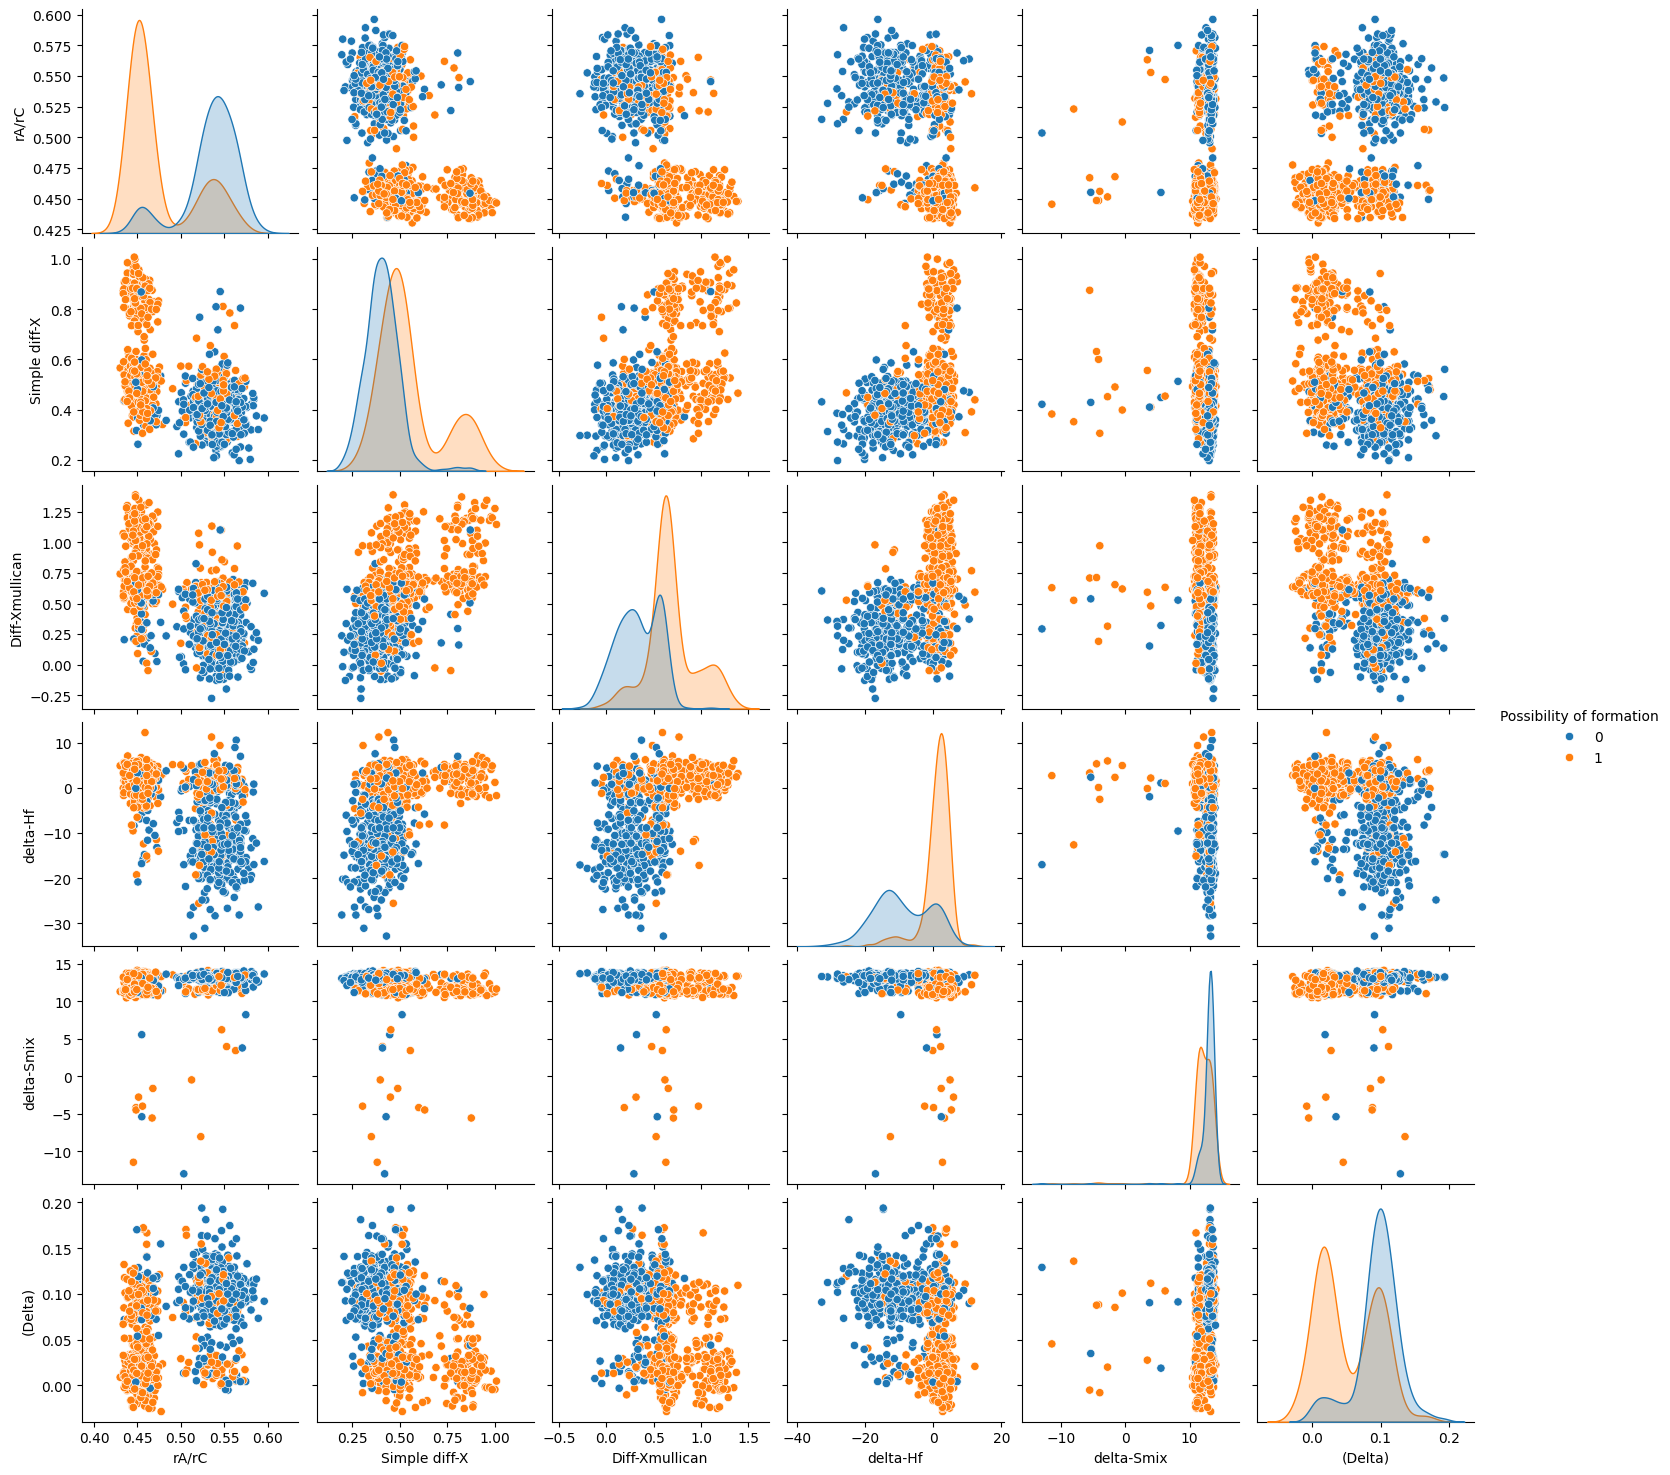

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from bayes_opt import BayesianOptimization

# --- Load dataset ---
df = pd.read_csv('samples_1000_CTGAN.csv')
df_test = pd.read_csv('test_set.csv')

# Separate features and target
X = df.drop(columns=["Possibility of formation"])
y = df["Possibility of formation"]

X_train = X
y_train = y
X_test = df_test.drop(columns=["Possibility of formation"])
y_test = df_test["Possibility of formation"]

# --- Standardize Features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Define Bayesian Optimization function with K-Fold Cross-Validation ---
def rf_evaluate(n_estimators):
    n_estimators = int(n_estimators)  # Convert float to int
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    
    # Perform K-Fold Cross-Validation (e.g., 5 folds) on training data
    cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    # Return the mean accuracy score across all folds
    return np.mean(cv_scores)

# --- Define Bayesian Optimizer ---
optimizer = BayesianOptimization(
    f=rf_evaluate,
    pbounds={'n_estimators': (10, 200)},  # Number of trees between 10 and 200
    random_state=42,
)

# --- Run optimization ---
optimizer.maximize(init_points=5, n_iter=20)

# --- Get best parameters ---
best_n_estimators = int(optimizer.max['params']['n_estimators'])
print(f"Best number of estimators: {best_n_estimators}")

# --- Train optimized Random Forest model ---
rf_model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)

# --- Perform K-Fold Cross-Validation on the final model ---
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {np.mean(cv_scores):.2f}")

# --- Final training on the full training data ---
rf_model.fit(X_train_scaled, y_train)

# --- Predictions ---
y_pred = rf_model.predict(X_test_scaled)

# --- Evaluate model ---
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Optimized Accuracy on Test Set: {accuracy:.2f}")
print("Classification Report:\n", report)

# --- Confusion Matrix Plot ---
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Multi-phase", "Single-phase"], 
            yticklabels=["Multi-phase", "Single-phase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# --- Extract optimization results ---
k_values = [int(res["params"]["n_estimators"]) for res in optimizer.res]
accuracy_scores = [res["target"] for res in optimizer.res]

# --- Sort values for better visualization ---
sorted_indices = np.argsort(k_values)
k_values = np.array(k_values)[sorted_indices]
accuracy_scores = np.array(accuracy_scores)[sorted_indices]

# --- Plot hyperparameter vs accuracy ---
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='b', label="Accuracy")
plt.xlabel("Number of Estimators (k)")
plt.ylabel("Accuracy Score")
plt.title("Hyperparameter Optimization: k vs Accuracy")
plt.xticks(k_values)  # Show exact k values on x-axis
plt.grid(True)
plt.legend()
plt.show()

# --- Plot Actual vs Predicted Labels ---
def plot_actual_vs_predicted(y, y_pred):
    plt.figure(figsize=(8, 5))
    plt.plot(y.values, label="Actual", marker='o', linestyle='dashed')
    plt.plot(y_pred, label="Predicted", marker='s', linestyle='dotted')
    plt.xlabel("Sample Index")
    plt.ylabel("Possibility of Formation")
    plt.title("Actual vs Predicted Values - Random Forest")
    plt.legend()
    plt.show()

plot_actual_vs_predicted(y_test, y_pred)

# --- Pairplot ---
def plot_pairplot(df):
    sns.pairplot(df, hue="Possibility of formation", diag_kind="kde")
    plt.show()

plot_pairplot(df)


SVM ON SYNTHETIC DATA AND TEST DATA

|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
| 1         | 0.5588    | -0.7528   | 0.7536    |
| 2         | 0.8463    | 1.392     | -1.007    |
| 3         | 0.5588    | -2.064    | -3.22     |
| 4         | 0.5588    | -2.651    | 0.3309    |
| 5         | 0.85      | 0.6067    | -0.4596   |
| 6         | 0.8088    | 2.059     | 0.4913    |
| 7         | 0.86      | 2.995     | -3.528    |
| 8         | 0.8538    | 1.302     | -3.994    |
| 9         | 0.845     | 2.995     | -1.664    |
| 10        | 0.8613    | 1.402     | -2.638    |
| 11        | 0.86      | 0.1636    | -1.817    |
| 12        | 0.6663    | 2.988     | 0.9895    |
| 13        | 0.8475    | 0.2378    | -3.317    |
| 14        | 0.8637    | 2.604     | -2.668    |
| 15        | 0.8588    | 2.389     | -3.994    |
| 16        | 0.8625    | 0.6291    | -2.435    |
| 17        | 0.8613    | 1.91      | -3.37     |
| 18        | 0.825     | 1.238     | 0.1087    |


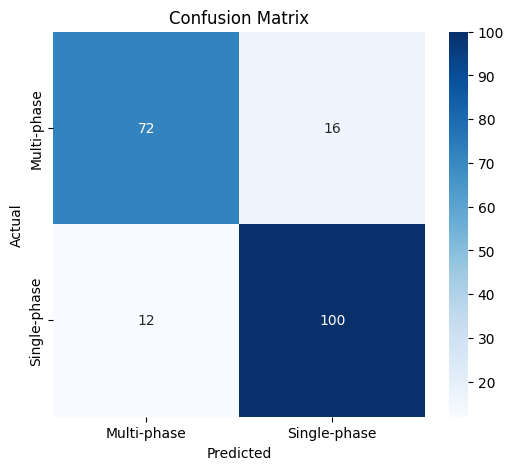

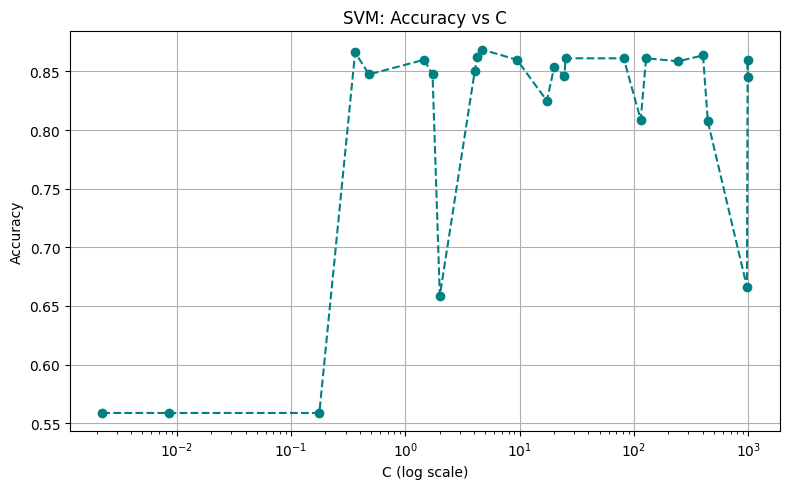

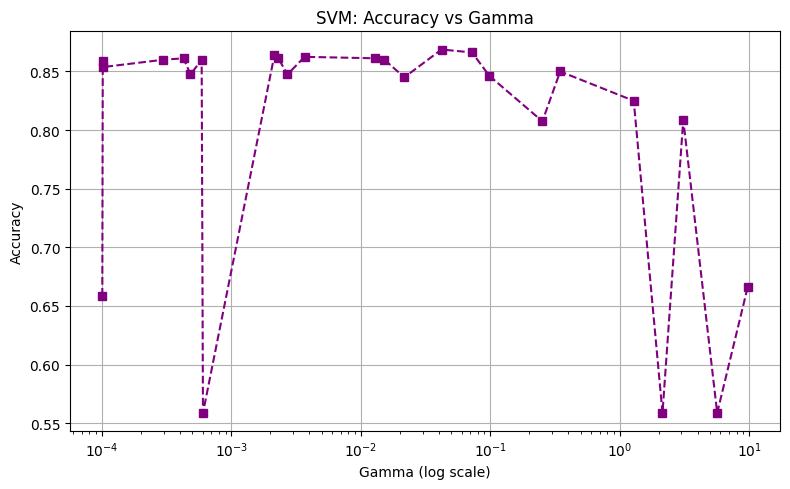

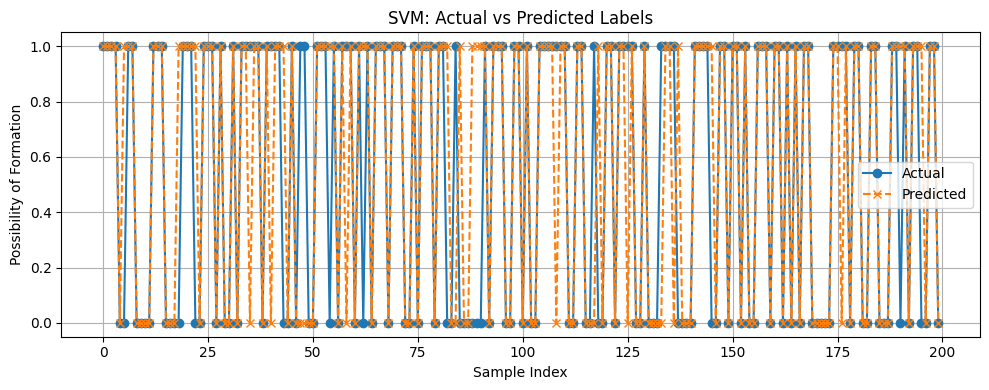

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from bayes_opt import BayesianOptimization

# --- Load Data ---
df = pd.read_csv('samples_1000_CTGAN.csv')

# Separate features and target
X = df.drop(columns=["Possibility of formation"])
y = df["Possibility of formation"]

# Split into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Standardize Features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Define Bayesian Optimization function with K-Fold Cross-Validation ---
def svm_evaluate(C, gamma):
    C = 10**C  # Convert from log scale
    gamma = 10**gamma  # Convert from log scale
    model = SVC(C=C, gamma=gamma, kernel='rbf', random_state=42)
    
    # Perform K-Fold Cross-Validation (e.g., 5 folds) on the training data
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    # Return the mean accuracy score across all folds
    return np.mean(cv_scores)

# --- Define Bayesian Optimizer ---
optimizer = BayesianOptimization(
    f=svm_evaluate,
    pbounds={'C': (-3, 3), 'gamma': (-4, 1)},  # Log scale: 10^-3 to 10^3 for C and 10^-4 to 10^1 for gamma
    random_state=42
)

# --- Run optimization ---
optimizer.maximize(init_points=5, n_iter=20)

# --- Get best parameters ---
best_params = optimizer.max['params']
best_C = 10**best_params['C']
best_gamma = 10**best_params['gamma']
print(f"\nBest SVM Parameters: C={best_C:.4f}, gamma={best_gamma:.4f}")

# --- Train Final Model with Best Params ---
best_svm = SVC(C=best_C, gamma=best_gamma, kernel='rbf', random_state=42)

# --- Perform K-Fold Cross-Validation on the final model ---
cv_scores = cross_val_score(best_svm, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {np.mean(cv_scores):.2f}")

# --- Final training on the full training data ---
best_svm.fit(X_train_scaled, y_train)

# --- Predictions ---
y_pred = best_svm.predict(X_test_scaled)

# --- Evaluate model ---
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Optimized Accuracy on Test Set: {accuracy:.2f}")
print("Classification Report:\n", report)

# --- Confusion Matrix Plot ---
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Multi-phase", "Single-phase"], 
            yticklabels=["Multi-phase", "Single-phase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# --- Extract optimization results ---
C_values = [10 ** res["params"]["C"] for res in optimizer.res]
gamma_values = [10 ** res["params"]["gamma"] for res in optimizer.res]
accuracy_scores = [res["target"] for res in optimizer.res]

# --- Convert to DataFrame for sorting/plotting ---
results_df = pd.DataFrame({
    'C': C_values,
    'gamma': gamma_values,
    'accuracy': accuracy_scores
})

# Sort by C
results_C = results_df.sort_values(by='C')
# Sort by gamma
results_gamma = results_df.sort_values(by='gamma')

# --- Plot Accuracy vs C ---
plt.figure(figsize=(8, 5))
plt.plot(results_C['C'], results_C['accuracy'], marker='o', linestyle='dashed', color='teal')
plt.xscale('log')
plt.xlabel("C (log scale)")
plt.ylabel("Accuracy")
plt.title("SVM: Accuracy vs C")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot Accuracy vs gamma ---
plt.figure(figsize=(8, 5))
plt.plot(results_gamma['gamma'], results_gamma['accuracy'], marker='s', linestyle='dashed', color='purple')
plt.xscale('log')
plt.xlabel("Gamma (log scale)")
plt.ylabel("Accuracy")
plt.title("SVM: Accuracy vs Gamma")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot Actual vs Predicted Labels ---
def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(10, 4))
    plt.plot(np.arange(len(y_test)), y_test, marker='o', linestyle='-', label='Actual')
    plt.plot(np.arange(len(y_pred)), y_pred, marker='x', linestyle='--', label='Predicted')
    plt.xlabel("Sample Index")
    plt.ylabel("Possibility of Formation")
    plt.title("SVM: Actual vs Predicted Labels")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_actual_vs_predicted(y_test.reset_index(drop=True), y_pred)


|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
| 1         | 0.56      | -0.7528   | 0.7536    |
| 2         | 0.849     | 1.392     | -1.007    |
| 3         | 0.559     | -2.064    | -3.22     |
| 4         | 0.559     | -2.651    | 0.3309    |
| 5         | 0.85      | 0.6067    | -0.4596   |
| 6         | 0.808     | 2.146     | 0.4875    |
| 7         | 0.862     | 2.996     | -3.308    |
| 8         | 0.854     | 1.302     | -3.994    |
| 9         | 0.846     | 2.988     | -1.57     |
| 10        | 0.857     | 0.8821    | -2.534    |
| 11        | 0.865     | 2.038     | -2.719    |
| 12        | 0.858     | 2.534     | -3.99     |
| 13        | 0.714     | 2.995     | 0.9783    |
| 14        | 0.86      | 0.1847    | -1.509    |
| 15        | 0.701     | 0.2088    | -3.99     |
| 16        | 0.858     | 1.81      | -3.465    |
| 17        | 0.858     | 0.9311    | -1.742    |
| 18        | 0.852     | 2.992     | -2.402    |


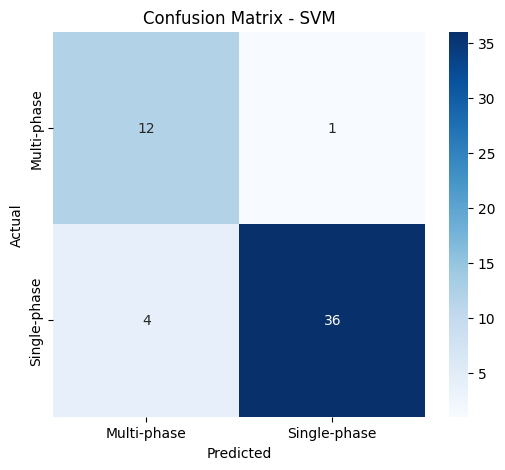

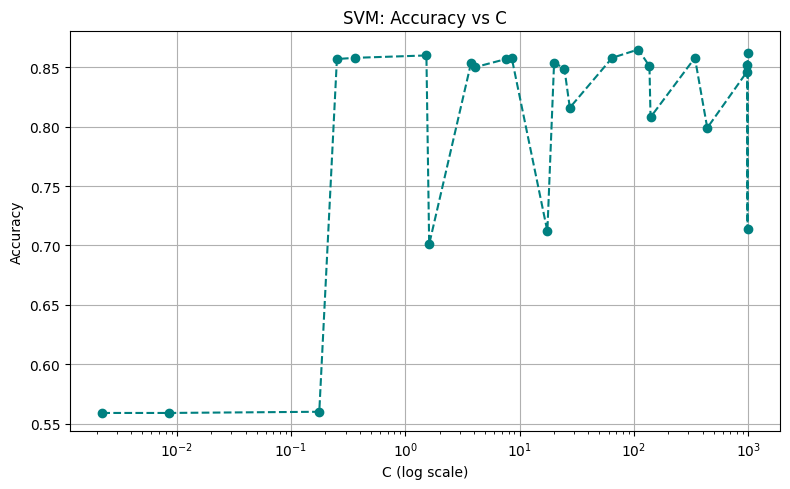

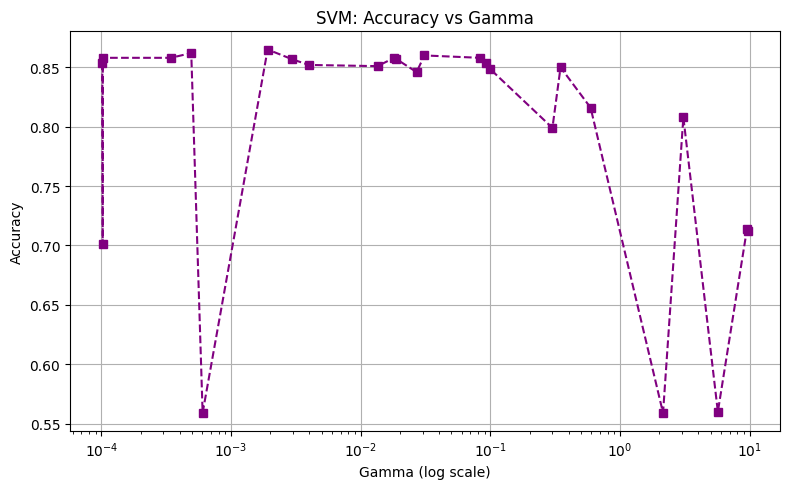

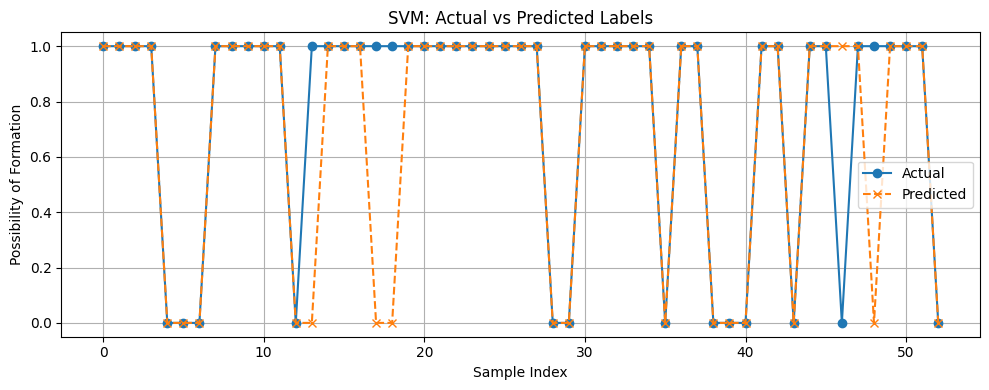

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from bayes_opt import BayesianOptimization

# --- Load Data ---
df = pd.read_csv('samples_1000_CTGAN.csv')
df_test = pd.read_csv('test_set.csv')

X = df.drop(columns=["Possibility of formation"])
y = df["Possibility of formation"]
X_test = df_test.drop(columns=["Possibility of formation"])
y_test = df_test["Possibility of formation"]

# --- Standardize Features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# --- Define Evaluation Function with K-Fold Cross-Validation ---
def svm_evaluate(C, gamma):
    C = 10**C  # Convert from log scale
    gamma = 10**gamma  # Convert from log scale
    model = SVC(C=C, gamma=gamma, kernel='rbf', random_state=42)
    
    # Perform K-Fold Cross-Validation (5 folds)
    cv_scores = cross_val_score(model, X_train_scaled, y, cv=5, scoring='accuracy')
    
    # Return the mean accuracy score across all folds
    return np.mean(cv_scores)

# --- Define Bayesian Optimizer ---
optimizer = BayesianOptimization(
    f=svm_evaluate,
    pbounds={'C': (-3, 3), 'gamma': (-4, 1)},  # Log scale: 10^-3 to 10^3 for C and 10^-4 to 10^1 for gamma
    random_state=42
)

# --- Run optimization ---
optimizer.maximize(init_points=5, n_iter=20)

# --- Get best parameters ---
best_params = optimizer.max['params']
best_C = 10**best_params['C']
best_gamma = 10**best_params['gamma']
print(f"\nBest SVM Parameters: C={best_C:.4f}, gamma={best_gamma:.4f}")

# --- Perform K-Fold Cross-Validation on the final model ---
final_svm = SVC(C=best_C, gamma=best_gamma, kernel='rbf', random_state=42)

# Perform cross-validation on the entire training dataset
cv_scores = cross_val_score(final_svm, X_train_scaled, y, cv=5, scoring='accuracy')
print(f"\nCross-validated Accuracy on Training Data: {np.mean(cv_scores):.2f}")

# --- Train Final Model ---
final_svm.fit(X_train_scaled, y)

# --- Predictions ---
y_pred = final_svm.predict(X_test_scaled)

# --- Evaluate model on Test Set ---
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Optimized Accuracy on Test Set: {accuracy:.2f}")
print("Classification Report:\n", report)

# --- Confusion Matrix Plot ---
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Multi-phase", "Single-phase"], 
            yticklabels=["Multi-phase", "Single-phase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

# --- Extract optimization results ---
C_values = [10 ** res["params"]["C"] for res in optimizer.res]
gamma_values = [10 ** res["params"]["gamma"] for res in optimizer.res]
accuracy_scores = [res["target"] for res in optimizer.res]

# --- Convert to DataFrame for sorting/plotting ---
results_df = pd.DataFrame({
    'C': C_values,
    'gamma': gamma_values,
    'accuracy': accuracy_scores
})

# Sort by C
results_C = results_df.sort_values(by='C')
# Sort by gamma
results_gamma = results_df.sort_values(by='gamma')

# --- Plot Accuracy vs C ---
plt.figure(figsize=(8, 5))
plt.plot(results_C['C'], results_C['accuracy'], marker='o', linestyle='dashed', color='teal')
plt.xscale('log')
plt.xlabel("C (log scale)")
plt.ylabel("Accuracy")
plt.title("SVM: Accuracy vs C")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot Accuracy vs gamma ---
plt.figure(figsize=(8, 5))
plt.plot(results_gamma['gamma'], results_gamma['accuracy'], marker='s', linestyle='dashed', color='purple')
plt.xscale('log')
plt.xlabel("Gamma (log scale)")
plt.ylabel("Accuracy")
plt.title("SVM: Accuracy vs Gamma")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot Actual vs Predicted Labels ---
def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(10, 4))
    plt.plot(np.arange(len(y_test)), y_test, marker='o', linestyle='-', label='Actual')
    plt.plot(np.arange(len(y_pred)), y_pred, marker='x', linestyle='--', label='Predicted')
    plt.xlabel("Sample Index")
    plt.ylabel("Possibility of Formation")
    plt.title("SVM: Actual vs Predicted Labels")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_actual_vs_predicted(y_test.reset_index(drop=True), y_pred)
